<center><img src="https://www.mindinventory.com/blog/wp-content/uploads/2019/04/python-development-1200x500.png" width="1000"></center>

# Programa de Especialización en Python


### Prof. Manuel Sigüeñas, M.Sc.(c)

### DESCRIPCIÓN
Predecir la aparición de diabetes con base en medidas de diagnóstico.

### RESUMEN
Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a mediciones de diagnóstico si un paciente tiene diabetes.

Se colocaron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de herencia indígena Pima.

### Información del atributo:

1) Pregnancies: número de veces de embarazo

2) Glucose: concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa

3) BloodPressure: presión arterial diastólica (mm Hg)

4) SkinThickness: grosor del pliegue de la piel del tríceps (mm)

5) Insulin: insulina sérica de 2 horas (mu U / ml)

6) BMI: índice de masa corporal (peso en kg / (altura en m) ^ 2)

7) DiabetesPedigreeFunction: función de pedigrí de diabetes

8) Age: edad (años)

9) Outcome: variable de clase (0 o 1)

**Fuente :**

https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Acknowledgements:**
    
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [8]:
import numpy as np
import pandas as pd
FileCSV="datos/diabetes.csv"
df_diabetes=pd.read_csv(FileCSV,sep=",")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0, 0.5, 'número de observaciones')

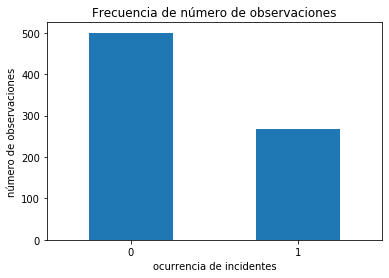

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = pd.value_counts(df_diabetes['Outcome'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia de número de observaciones")
plt.xlabel("ocurrencia de incidentes")
plt.ylabel("número de observaciones")

<a id='part2'></a>
## Construir data de entrenamiento y de prueba (test)  

In [11]:
from sklearn.model_selection import train_test_split

X, y = df_diabetes.iloc[:, 0:8].values, df_diabetes.iloc[:, 8].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.4, 
                     random_state=0, 
                     stratify=y)

## Entrenamiento del modelo

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Validación del modelo

In [16]:
#entrenamiento 
clf.score(X_train,y_train)

0.7608695652173914

In [17]:
#prueba / test
clf.score(X_test,y_test)

0.737012987012987

## Despliegue del modelo

In [18]:
from joblib import dump
dump(clf, 'Modelo.joblib') 

['Modelo.joblib']

In [19]:
from joblib import load
clf = load('Modelo.joblib') #Cargamos el modelo

In [20]:
d = {'Pregnancies': [6], 'Glucose': [148],'BloodPressure': [72], 'SkinThickness': [36],
     'Insulin': [0], 'BMI': [33.6],'DiabetesPedigreeFunction': [0.625], 'Age': [50]}
df = pd.DataFrame(data=d)

In [21]:
clf.predict(df)[0]#Precedimos el modelo

1

In [22]:
probabilidad=clf.predict_proba(df)[0]
if probabilidad[0] < 0.5:
      salida="Diabetes"
      probabilidad2=probabilidad[1]
else:
    probabilidad2=probabilidad[0]
    salida="No Diabetes"
print(salida)
print(probabilidad)
print("La predicción fue de clase '"+salida+"' con una probabilidad de "+str(round(float(probabilidad2),2)))

Diabetes
[0.22727273 0.77272727]
La predicción fue de clase 'Diabetes' con una probabilidad de 0.77
